   # The Spark Foundation -GRIPAPR21
   
   ## Task-1 : Prediction using Supervised ML
   
   

### **Data Source: http://bit.ly/w-data**

###  Github Links :

### Problem Statement :Predict the percentage of an student based on the number of study hours.


________________________[Asmita Rampurkar](https://www.linkedin.com/in/asmita-rampurkar-33b63b16b)

#### Importing Requred libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Importing DataSet

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Task_1.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Observation : there no null Values in Data

### Visualizing data

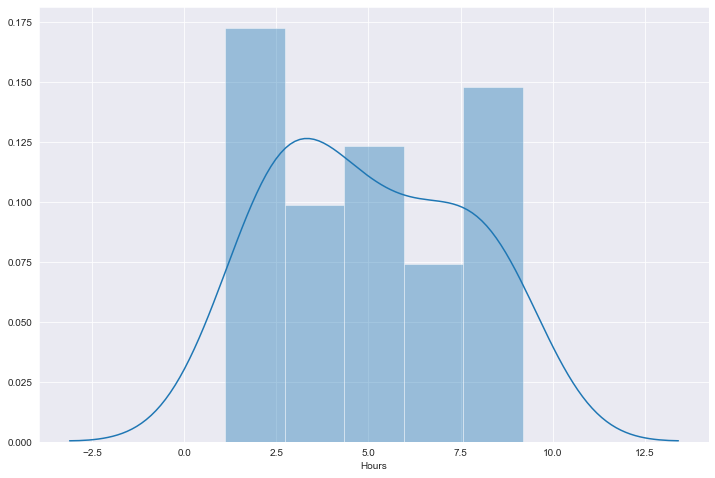

In [8]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df['Hours'],bins=5)

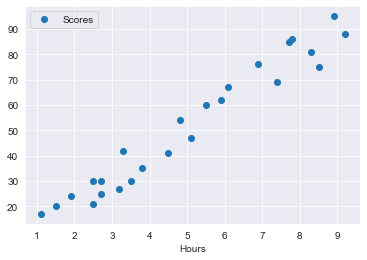

In [9]:
df.plot(x='Hours', y='Scores', style='o')  

### Preparing data for module

In [10]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

In [11]:
X_train ,X_test,Y_train,Y_test= train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

### Training data


In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


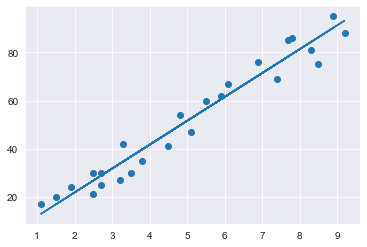

In [13]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### **Making Predictions**

In [14]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
Y_pred=regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


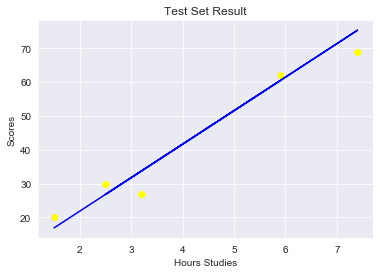

In [17]:
plt.scatter(X_test,Y_test,color='yellow')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.title('Test Set Result')
plt.xlabel('Hours Studies')
plt.ylabel('Scores')
plt.show()

#### what will be the score of student if he or she stidies for 9.25 hrs/day

In [18]:
new_predict=regressor.predict([[9.25]])
new_predict

array([93.69173249])

#### Model predicts that if student studies for 9.25 hrs/day he or She will Score 94 Marks

### **Evaluating the model**

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


In [20]:
from sklearn.metrics import r2_score
print('R2 Score:',r2_score(Y_test, Y_pred))

R2 Score: 0.9454906892105356
